# **プログラムの名称**

## **概要**

APIを利用した、都道府県名を入力すると気象情報を表示するプログラムです。
天気図・一週間先までの最高/最低気温・今日の天気が表示されます

気象庁のwebサイトにあるAPIと、都道府県名を番号（https://www.mhlw.go.jp/topics/2007/07/dl/tp0727-1d.pdf）に変換するAPIを利用しています。

## **操作方法**

最初に都道府県を入力する必要があります。ここでは「大阪府」「福岡県」のように、地名だけでなく「県」などを付ける必要があります。
北海道を選択した場合は、細かい地域を選択する必要があります。

はい・いいえを入力する場合は、「はい」以外を入力すると、「いいえ」としてカウントされます。

## **制作者のコメント**

かなり前から知っていた気象庁のAPIをやっと使いこなせるようになったので、その点は嬉しかったです。

## **作成時間**

作成時間：**約8時間**

プログラムを書く前の準備として、JSONファイルの構造とその処理方法の学習に約3時間をかけました。この学習では、vscodeでJSONファイルを整形し、取得のために構造を理解することから、簡単な取得のプログラムも作成しました。
課題のプログラムの作成と説明文の作成は5時間ほどかかりました。

In [ ]:
#@title 初期化 ( %reset -f )
%reset -f

In [ ]:
import requests
import matplotlib.pyplot as plt
from PIL import Image
import json
import io

# 地域コードと県名の対応表json
url = f"https://www.jma.go.jp/bosai/common/const/area.json"
ur = requests.get(url)
# json解析
areajson = json.loads(ur.text)

# 都道府県名→APIのページURL変換関数
def search(p):
  pref = "https://madefor.github.io/jisx0401/api/v1/jisx0401-ja.json"
  pr = requests.get(pref)
  prcode = json.loads(pr.text)
  # 都道府県コード(01~47)を名前から取得
  keys = [k for k, v in prcode.items() if v == p]
  if len(keys) == 0:
    return 0
  elif(keys[0]=="01"):
    # 北海道は振興局分けのため、配列を別途用意
    sh = areajson['centers']['010100']['children']
    shname = []
    # jsonファイル内の要素chilerenをもとに、地方名を取得し一覧表示
    for i in sh:
      print(areajson['offices'][i]['name'])
      shname.append(areajson['offices'][i]['name'])
    shi = input("地方名を一覧から入力してください：")
    # print(shname)
    # 十勝地方のみ取得ができないため、処理を用意
    if shi == "十勝地方":
      return "014100"
    else:
      return sh[shname.index(shi)]
  else:
    # 通常は県番号2桁+0000
    wcode = str(keys[0])+"0000"
    return wcode

# jsonデータから今日の天気表示
def get_today(jsondata):
  # 時間取得
  timedefines = jsondata[0]['timeSeries'][0]['timeDefines']

  # 天気情報取得
  weathers = jsondata[0]['timeSeries'][0]['areas'][0]['weathers']

  for getDate,getWeather in zip(timedefines,weathers):

      getDate = getDate[:10]
      getWeather = getWeather.replace('\u3000',' ')
      print(f"今日{getDate}の天気は、 {getWeather} です。\n")

# jsonデータから週間の最高・最低気温表示
def getweek(jsondata):
  week = jsondata[1]['timeSeries'][0]['timeDefines']
  weektempmin = jsondata[1]['timeSeries'][1]['areas'][0]['tempsMin']
  weektempmax = jsondata[1]['timeSeries'][1]['areas'][0]['tempsMax']

  for getWeek,getMax,getMin in zip(week,weektempmin,weektempmax):

      getWeek = getWeek[:10]

      print(f"{getWeek} 最高気温:{getMax},最低気温:{getMin}")
  print("\n")
def get_pic():
  # URL取得→解析
  purl = "https://www.jma.go.jp/bosai/weather_map/data/list.json"
  r = requests.get(purl)
  jdata = json.loads(r.text)

  # 画像のURL
  pic = jdata['near']['ft24'][0]
  picurl = f"https://www.jma.go.jp/bosai/weather_map/data/png/{pic}"
  img = Image.open(io.BytesIO(requests.get(picurl).content))
  print("また、天気図は以下のとおりです。")
  return img


都道府県名を入力してください　例:大阪府
大阪府
今日2023-07-25の天気は、 晴れ です。

今日2023-07-26の天気は、 晴れ 時々 くもり 所により 昼過ぎ から 夜のはじめ頃 雨 で 雷を伴い 激しく 降る です。

今日2023-07-27の天気は、 晴れ 時々 くもり です。

2023-07-26 最高気温:,最低気温:
2023-07-27 最高気温:27,最低気温:37
2023-07-28 最高気温:27,最低気温:36
2023-07-29 最高気温:26,最低気温:36
2023-07-30 最高気温:27,最低気温:36
2023-07-31 最高気温:27,最低気温:36
2023-08-01 最高気温:27,最低気温:35


また、天気図は以下のとおりです。


KeyboardInterrupt: ignored

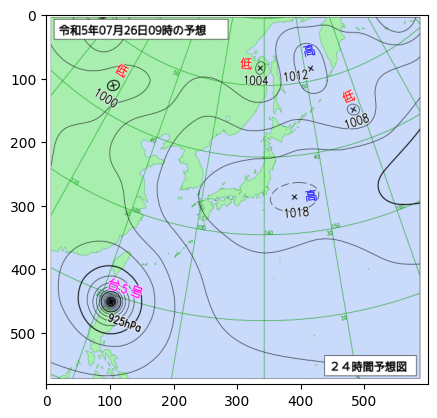

In [ ]:
#@title メイン処理
while True:
  print("都道府県名を入力してください　例:大阪府")
  code = search(input())
  if code == 0:
    yn = input("地域が見つかりません。最初に戻りますか？ \n 続ける場合は「はい」と入力してください")
    if yn == "はい":
      continue
    else:
      break
  weather = f"https://www.jma.go.jp/bosai/forecast/data/forecast/{code}.json"

  r = requests.get(weather)
  jdata = json.loads(r.text)


  get_today(jdata)
  getweek(jdata)
  plt.imshow(get_pic())

  yn = input("続けますか？ \n 続ける場合は「はい」と入力してください")
  if yn == "はい":
      continue
  else:
      break



